<a href="https://colab.research.google.com/github/jorgewellison/classifiers-tcc/blob/main/Decision-tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Configurações iniciais**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Importação das bibliotecas**

In [9]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export
from sklearn.model_selection import KFold
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn import preprocessing, tree


**Importando previsores e classe (tratados no pré-processamento)**

previsores -> variáveis independentes - X

---



classe -> variável dependente - y

In [43]:
previsores = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/previsores_.csv") 
classe_inc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_inc.csv") 
classe_mort = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_mort.csv") 


#**Criação, treinamento dos modelos e visualização de atributos mais importantes**

##**Incidência**##

**Treinamento**

---



In [44]:
arvore_inc = DecisionTreeClassifier()
arvore_inc.fit(previsores, classe_inc)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Obtenção dos atributos mais importantes**

---

In [45]:
arvore_inc.feature_importances_

array([0.16495517, 0.00227926, 0.01060108, 0.01326712, 0.01701329,
       0.02270507, 0.01746281, 0.01783912, 0.0141551 , 0.01158838,
       0.00839477, 0.01116405, 0.01003775, 0.0061775 , 0.00282329,
       0.00872368, 0.00972042, 0.01498089, 0.01197884, 0.01806736,
       0.0202231 , 0.00810456, 0.0127718 , 0.01066098, 0.02110129,
       0.01453758, 0.01359584, 0.01194836, 0.01074479, 0.00381954,
       0.01131309, 0.01475158, 0.02133496, 0.00659612, 0.01728645,
       0.01313   , 0.01303899, 0.01496416, 0.02441741, 0.01074517,
       0.03229482, 0.0108723 , 0.00996052, 0.00730933, 0.01574457,
       0.01266285, 0.02820406, 0.01062923, 0.00659393, 0.00870572,
       0.00551426, 0.00874835, 0.01440149, 0.01895403, 0.01530951,
       0.01151658, 0.0109608 , 0.00896275, 0.00503958, 0.00413391,
       0.01249817, 0.00416038, 0.00787699, 0.0034489 , 0.0108381 ,
       0.00382775, 0.00493941, 0.00496208, 0.03190892])

**Representação de atributos mais importantes em forma de gráfico**

---




Text(0.5, 1.0, 'Importância de cada feature')

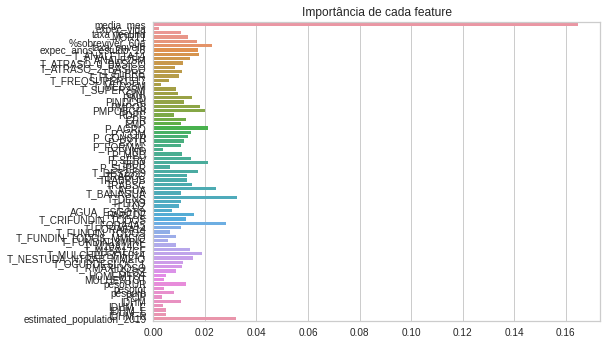

In [46]:
importances = pd.Series(data=arvore_inc.feature_importances_, index=previsores.columns.values)
sns.barplot(x=importances, y=importances.index, orient='h', ci=0).set_title('Importância de cada feature')

##**Mortalidade**##

**Treinamento**

---



In [47]:
arvore_mort = DecisionTreeClassifier()
arvore_mort.fit(previsores, classe_mort)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Obtenção dos atributos mais importantes**


--- 

In [48]:
arvore_mort.feature_importances_

array([0.15003386, 0.0068988 , 0.01606027, 0.00748984, 0.0125485 ,
       0.01522078, 0.01727869, 0.01074222, 0.01642052, 0.01155333,
       0.00592088, 0.0161681 , 0.01094762, 0.02100252, 0.00736148,
       0.01104397, 0.00874788, 0.0049535 , 0.01098253, 0.0058774 ,
       0.01030693, 0.00786491, 0.02645194, 0.02837759, 0.02404446,
       0.01261989, 0.01710988, 0.00997565, 0.00715645, 0.00929404,
       0.0061274 , 0.01067447, 0.01964466, 0.00665674, 0.01444389,
       0.01489759, 0.01990189, 0.01201158, 0.02225977, 0.00736851,
       0.02962407, 0.01083494, 0.0056561 , 0.01127229, 0.01150597,
       0.00664883, 0.00833397, 0.01652474, 0.00874873, 0.0049258 ,
       0.00694172, 0.00779256, 0.02081997, 0.01518135, 0.00977771,
       0.01587776, 0.00869554, 0.00835094, 0.00669144, 0.01747929,
       0.01708316, 0.00434417, 0.04374774, 0.00790453, 0.00449282,
       0.01114069, 0.00669211, 0.00332822, 0.01514191])

**Representação de atributos mais importantes em forma de gráfico**

---




Text(0.5, 1.0, 'Importância de cada feature')

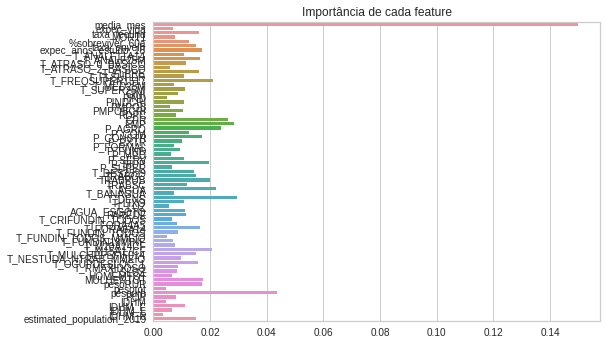

In [49]:
importances2 = pd.Series(data=arvore_mort.feature_importances_, index=previsores.columns.values)
sns.barplot(x=importances2, y=importances2.index, orient='h', ci=0).set_title('Importância de cada feature')

#**Testes com validação cruzada**

**Criação do KFold com 10 iterações e Shuffle para embaralhar as linhas, desagrupando os municipios de seus estados**

---



In [ ]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average = 'macro'),
           'recall' : make_scorer(recall_score, average = 'macro'), 
           'f1_score' : make_scorer(f1_score, average = 'macro')}

##Testes de incidência##

In [ ]:
#a função cross_validate recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de folds e o metodo de avaliação

scores = cross_validate(arvore_inc, 
                        previsores, 
                        classe_inc,
                        cv=cv,
                        scoring=scoring,
                        return_train_score=False)

###Avaliação dos testes###

In [ ]:
scores

{'fit_time': array([0.38452816, 0.38652444, 0.39846587, 0.37235951, 0.37304664,
        0.38579702, 0.37774348, 0.37159729, 0.35644937, 0.38905907]),
 'score_time': array([0.00454092, 0.00446296, 0.00492477, 0.00550604, 0.00448537,
        0.00430036, 0.00441694, 0.00439811, 0.00440025, 0.00457335]),
 'test_accuracy': array([0.59066427, 0.61400359, 0.56014363, 0.60861759, 0.56193896,
        0.5557554 , 0.55215827, 0.58273381, 0.57014388, 0.58453237]),
 'test_f1_score': array([0.51492689, 0.5259669 , 0.45950315, 0.48699273, 0.44932796,
        0.45731088, 0.44217401, 0.48282274, 0.4599948 , 0.4901519 ]),
 'test_precision': array([0.50909436, 0.52146339, 0.46094789, 0.48878747, 0.44975245,
        0.45560216, 0.44354209, 0.48181835, 0.45899049, 0.48610761]),
 'test_recall': array([0.5228695 , 0.53381623, 0.4584534 , 0.48866138, 0.44913637,
        0.45962847, 0.44196414, 0.48473843, 0.47026287, 0.4975291 ])}

##Testes de mortalidade##

In [ ]:
#a função cross_validate recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de folds e o metodo de avaliação

scores2 = cross_validate(arvore_mort, 
                         previsores, 
                         classe_mort,
                         scoring=scoring,
                         cv=cv,
                         return_train_score=False)

###Avaliação dos testes###

In [ ]:
scores2

{'fit_time': array([0.3496139 , 0.35262108, 0.38365841, 0.34559536, 0.35988665,
        0.37170529, 0.35961604, 0.36277866, 0.34436369, 0.36322474]),
 'score_time': array([0.00536108, 0.00489807, 0.00459838, 0.00426269, 0.007061  ,
        0.0055778 , 0.00474501, 0.00431323, 0.00442886, 0.00450635]),
 'test_accuracy': array([0.54039497, 0.53859964, 0.54039497, 0.51526032, 0.52244165,
        0.52338129, 0.50539568, 0.54496403, 0.54676259, 0.52517986]),
 'test_f1_score': array([0.48214519, 0.4888159 , 0.47998953, 0.46861784, 0.46842444,
        0.47961136, 0.45067051, 0.49773056, 0.48519419, 0.48559861]),
 'test_precision': array([0.48101251, 0.48810586, 0.48219769, 0.47168253, 0.47059006,
        0.47945126, 0.45023551, 0.49803732, 0.48533511, 0.48640366]),
 'test_recall': array([0.49140668, 0.49026752, 0.47908412, 0.46716111, 0.46710295,
        0.48186976, 0.451279  , 0.49768671, 0.48630952, 0.4856413 ])}

# **Predição e Matriz de confusão**

### Predição e Matriz da incidência

In [ ]:
predictions = cross_val_predict(arvore_inc, previsores, classe_inc, cv=cv)
confusao = confusion_matrix(classe_inc, predictions)
confusao

array([[1618,  195,  821],
       [ 192,   92,  147],
       [ 823,  154, 1523]])

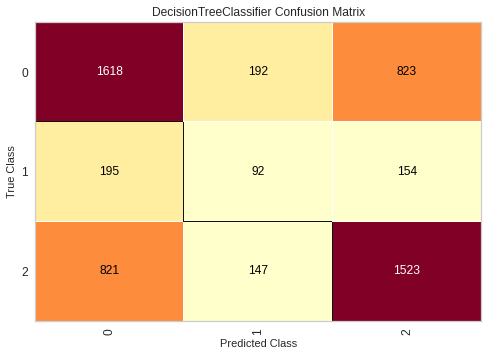

In [ ]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(previsores, classe_inc)
v.score(previsores, predictions)
v.poof()

### Predição e Matriz da mortalidade

In [ ]:
predictions2 = cross_val_predict(arvore_mort, previsores, classe_mort, cv=cv)
confusao2 = confusion_matrix(classe_mort, predictions2)
confusao2

array([[1186,  245,  731],
       [ 238,  247,  344],
       [ 703,  350, 1521]])

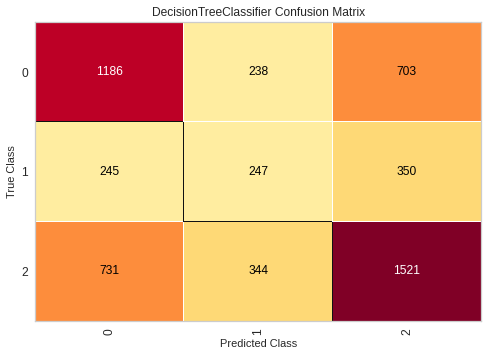

In [ ]:
v2 = ConfusionMatrix(DecisionTreeClassifier())
v2.fit(previsores, classe_mort)
v2.score(previsores, predictions2)
v2.poof()

**Taxa de acerto**

In [ ]:
scores.mean() #méd

0.5839953889671028

In [ ]:
scores2.mean()

0.5309988633868489

# **Métricas de avaliação**

**Predição de Incidência**

In [ ]:
metrics.accuracy_score(classe_inc, predictions)

0.580952380952381

In [ ]:
metrics.precision_score(classe_inc, predictions, average=None)

array([0.61450817, 0.20861678, 0.61140104])

In [ ]:
metrics.recall_score(classe_inc, predictions, average=None)

array([0.61427487, 0.21345708, 0.6092    ])

In [ ]:
metrics.f1_score(classe_inc, predictions, average=None)

array([0.61439149, 0.21100917, 0.61029854])

**Predição de Mortalidade**

In [ ]:
metrics.accuracy_score(classe_mort, predictions2)

0.5308176100628931

In [ ]:
metrics.precision_score(classe_mort, predictions2, average=None)

array([0.55759285, 0.29334917, 0.58590139])

In [ ]:
metrics.recall_score(classe_mort, predictions2, average=None)

array([0.54856614, 0.29794934, 0.59090909])

In [ ]:
metrics.f1_score(classe_mort, predictions2, average=None)

array([0.55304267, 0.29563136, 0.58839458])

###**Exportação da árvore de decisão do algoritmo de treinamento, com o formato .dot para posterior visualização**

In [ ]:
export_graphviz(arvore_inc, 
                out_file = 'tree_inc.dot',
                feature_names = ['media_mes', 'expec_vida', 'taxa_fecund','MORT1','%sobreviver_60a','taxa_envelh','expec_anos_estudo_18','T_ANALF11A14','T_ANALF25M','T_ATRASO_0_BASICO','T_ATRASO_2_BASICO','T_FLPRE','T_FLSUPER','T_FREQSUPER1517','T_MED25M','T_SUPER25M','GINI','PIND','PINDCRI','PMPOB','PMPOBCRI','RDPC','CPR','EMP','P_AGRO','P_COM','P_CONSTR','P_EXTR','P_FORMAL','P_FUND','P_MED','P_SERV','P_SIUP','P_SUPER','T_DES2529','TRABCC','TRABPUB','TRABSC','T_AGUA','T_BANAGUA','T_DENS','T_LIXO','T_LUZ','AGUA_ESGOTO','PAREDE','T_CRIFUNDIN_TODOS','T_FORA4A5','T_FORA6A14','T_FUNDIN_TODOS','T_FUNDIN_TODOS_MMEIO','T_FUNDIN18MINF','T_M10A14CF','T_M15A17CF','T_MULCHEFEFIF014','T_NESTUDA_NTRAB_MMEIO','T_OCUPDESLOC_1','T_RMAXIDOSO','T_SLUZ','HOMEMTOT','MULHERTOT','pesoRUR','pesotot','pesourb','POP','IDHM','IDHM_E','IDHM_L','IDHM_R','estimated_population_2019'],
                class_names = ['0', '1', '2'],
                filled = True,
                leaves_parallel=True)

In [ ]:
export_graphviz(arvore_mort, 
                out_file = 'tree_mort.dot',
                feature_names = ['media_mes', 'expec_vida', 'taxa_fecund','MORT1','%sobreviver_60a','taxa_envelh','expec_anos_estudo_18','T_ANALF11A14','T_ANALF25M','T_ATRASO_0_BASICO','T_ATRASO_2_BASICO','T_FLPRE','T_FLSUPER','T_FREQSUPER1517','T_MED25M','T_SUPER25M','GINI','PIND','PINDCRI','PMPOB','PMPOBCRI','RDPC','CPR','EMP','P_AGRO','P_COM','P_CONSTR','P_EXTR','P_FORMAL','P_FUND','P_MED','P_SERV','P_SIUP','P_SUPER','T_DES2529','TRABCC','TRABPUB','TRABSC','T_AGUA','T_BANAGUA','T_DENS','T_LIXO','T_LUZ','AGUA_ESGOTO','PAREDE','T_CRIFUNDIN_TODOS','T_FORA4A5','T_FORA6A14','T_FUNDIN_TODOS','T_FUNDIN_TODOS_MMEIO','T_FUNDIN18MINF','T_M10A14CF','T_M15A17CF','T_MULCHEFEFIF014','T_NESTUDA_NTRAB_MMEIO','T_OCUPDESLOC_1','T_RMAXIDOSO','T_SLUZ','HOMEMTOT','MULHERTOT','pesoRUR','pesotot','pesourb','POP','IDHM','IDHM_E','IDHM_L','IDHM_R','estimated_population_2019'],
                class_names = ['0', '1', '2'],
                filled = True,
                leaves_parallel=True)